# **Implementation of Classification Models: Music Genre Classification**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('music_data.csv', index_col = 0)
df

,danceability,loudness,speechiness,acousticness,valence,duration_in min/ms,Class
8676,0.407002,0.594976,0.024848,0.684549,0.642969,0.494506,9
11957,0.404814,0.710302,0.259259,0.002242,0.018736,0.503115,8
1401,0.507659,0.430539,0.535865,0.185622,0.494119,0.450064,5
4951,0.493435,0.423370,0.085091,0.004174,0.033413,0.815886,6
3124,0.464989,0.316624,0.039850,0.944206,0.067555,0.398829,9
...,...,...,...,...,...,...,...
13116,0.176149,0.558058,0.148148,0.000051,0.090247,0.733767,8
5770,0.226477,0.698956,0.587436,0.007167,0.317165,0.229141,8
13199,0.335886,0.762856,0.088842,0.000078,0.709587,0.375854,8
15057,0.575492,0.595371,0.041491,0.273605,0.867805,0.388293,6


## **Separation of Data and Training**

- Train set
- Test set

In [ ]:
# Target variable and features
X = df.drop('Class', axis=1)
y = df['Class']

# Train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Logistic Regression**

In [ ]:
model_lr = LogisticRegression(
    penalty='l2',       # Regularization penalty ('l1' or 'l2')
    C=1.0,              # Inverse of regularization strength
    # fit_intercept=True, # Whether to calculate the intercept for this model
    solver='lbfgs',     # Algorithm to use in optimization ('lbfgs' is a good default)
    max_iter=50,       # Maximum number of iterations for optimization
    random_state=42,    # Seed for random number generation
)

In [ ]:
# Fitting of model
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=50, random_state=42)

### **Evaluation Pre-Tuning**

In [ ]:
def evaluate(y_true, y_pred):
  # Calculate accuracy
  accuracy = accuracy_score(y_true, y_pred)
  print(f'accuracy: {accuracy * 100:.2f}%')

  # Calculate precision for each class separately and then take the average
  precision = precision_score(y_true, y_pred, average='macro')
  print(f'precision: {precision * 100:.2f}%')

  # Calculate recall for each class separately and then take the average
  recall = recall_score(y_true, y_pred, average='macro')
  print(f'recall: {recall * 100:.2f}%')

  # Calculate the confusion matrix
  conf_matrix = confusion_matrix(y_true, y_pred)
  print("Confusion Matrix:")
  print(conf_matrix)

In [ ]:
# Evaluating with train data
print('Evalution with Training Data:')
y_train_pred = model_lr.predict(X_train)
evaluate(y_train, y_train_pred)

Evalution with Training Data:
accuracy: 65.46%
precision: 64.64%
recall: 65.39%
Confusion Matrix:
[[898  72  30 175]
 [ 85 448 278 285]
 [  4 160 891  23]
 [141 256  50 717]]


In [ ]:
# Evaluation with test data
print('\nEvaluation with Testing Data:')
y_test_pred = model_lr.predict(X_test)
evaluate(y_test, y_test_pred)


Evaluation with Testing Data:
accuracy: 66.15%
precision: 65.19%
recall: 66.02%
Confusion Matrix:
[[384  35  13  62]
 [ 45 200 110 136]
 [  0  59 416  19]
 [ 54  94  28 280]]


### **Fixing Underfitting**

#### **Hyper-parameter Tuning**

In [ ]:
# Define a grid of hyperparameters to search
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000],
}

# Perform grid search with cross-validation
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', verbose=1)
grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search_lr.best_params_

# Train a Logistic Regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params)
best_logistic_regression.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, solver='saga')

#### **Evaluation of Model**

In [ ]:
# Evaluating with train data
print('Evaluation with Training Data:')
y_train_pred = best_logistic_regression.predict(X_train)
evaluate(y_train, y_train_pred)

Evaluation with Training Data:
accuracy: 65.54%
precision: 64.73%
recall: 65.49%
Confusion Matrix:
[[900  79  24 172]
 [ 85 449 276 286]
 [  3 155 897  23]
 [142 266  44 712]]


In [ ]:
# Evaluation with test data
print('Evaluation with Testing Data:')
y_test_pred = best_logistic_regression.predict(X_test)
evaluate(y_test, y_test_pred)

Evaluation with Testing Data:
accuracy: 65.94%
precision: 64.91%
recall: 65.80%
Confusion Matrix:
[[383  36  13  62]
 [ 46 200 113 132]
 [  0  59 417  18]
 [ 58  96  26 276]]


## **Random Forest Classifier**

In [ ]:
'''
random_forest = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,     # Maximum depth of the tree (None means no limit)
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
    max_features='auto',  # Number of features to consider for the best split ('auto' means sqrt(n_features))
    random_state=42,     # Seed for random number generation
    n_jobs=-1            # Number of CPU cores to use for parallelism (-1 uses all available cores)
)'''

"\nrandom_forest = RandomForestClassifier(\n    n_estimators=100,  # Number of trees in the forest\n    max_depth=None,     # Maximum depth of the tree (None means no limit)\n    min_samples_split=2,  # Minimum number of samples required to split an internal node\n    min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node\n    max_features='auto',  # Number of features to consider for the best split ('auto' means sqrt(n_features))\n    random_state=42,     # Seed for random number generation\n    n_jobs=-1            # Number of CPU cores to use for parallelism (-1 uses all available cores)\n)"

In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth = None, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

### **Evaluation Pre-Tuning**

In [ ]:
# Evaluating with train data
y_train_pred = model.predict(X_train)
evaluate(y_train, y_train_pred)

accuracy: 99.18%
precision: 99.20%
recall: 99.19%
Confusion Matrix:
[[1167    0    0    8]
 [   0 1085    0   11]
 [   0    0 1077    1]
 [   9    7    1 1147]]


In [ ]:
# Evaluation with test data
y_test_pred = model.predict(X_test)
evaluate(y_test, y_test_pred)

accuracy: 82.22%
precision: 81.81%
recall: 82.12%
Confusion Matrix:
[[447  17   5  25]
 [ 32 325  56  78]
 [  0  21 463  10]
 [ 31  60   9 356]]


### **Fixing Overfitting**

#### **Selection of Features**

In [ ]:
# Your list of strings
input_list = list(df.columns[:-1])

# Initialize an empty list to store the combinations of lists
combinations_of_lists = []

# Generate combinations of different lengths from the input list
for r in range(1, len(input_list) + 1):
    # Use itertools.combinations to generate combinations of length 'r'
    for combo in combinations(input_list, r):
        combinations_of_lists.append(list(combo))

# Include an empty list as one of the combinations
combinations_of_lists.append([])

# Print the resulting list of combinations
for combo in combinations_of_lists:
    print(combo)

['danceability']
['loudness']
['speechiness']
['acousticness']
['valence']
['duration_in min/ms']
['danceability', 'loudness']
['danceability', 'speechiness']
['danceability', 'acousticness']
['danceability', 'valence']
['danceability', 'duration_in min/ms']
['loudness', 'speechiness']
['loudness', 'acousticness']
['loudness', 'valence']
['loudness', 'duration_in min/ms']
['speechiness', 'acousticness']
['speechiness', 'valence']
['speechiness', 'duration_in min/ms']
['acousticness', 'valence']
['acousticness', 'duration_in min/ms']
['valence', 'duration_in min/ms']
['danceability', 'loudness', 'speechiness']
['danceability', 'loudness', 'acousticness']
['danceability', 'loudness', 'valence']
['danceability', 'loudness', 'duration_in min/ms']
['danceability', 'speechiness', 'acousticness']
['danceability', 'speechiness', 'valence']
['danceability', 'speechiness', 'duration_in min/ms']
['danceability', 'acousticness', 'valence']
['danceability', 'acousticness', 'duration_in min/ms']
['d

In [ ]:
for cols in combinations_of_lists[:-1]:
  new_df = df[cols + ['Class']]
  # Target variable and features
  X = new_df.drop('Class', axis=1)
  y = new_df['Class']

  # Train, validation and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  new_model = RandomForestClassifier(n_estimators=10, random_state=42)
  new_model.fit(X_train, y_train)

  print('\n=============================================')
  print(cols)
  y_train_pred = new_model.predict(X_train)
  accuracy = accuracy_score(y_train, y_train_pred)
  print(f'Accuracy (Training): {accuracy * 100:.2f}%')

  y_test_pred = new_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_test_pred)
  print(f'Accuracy (Testing): {accuracy * 100:.2f}%')


['danceability']
Accuracy (Training): 61.51%
Accuracy (Testing): 50.96%

['loudness']
Accuracy (Training): 88.03%
Accuracy (Testing): 59.69%

['speechiness']
Accuracy (Training): 65.77%
Accuracy (Testing): 51.63%

['acousticness']
Accuracy (Training): 78.77%
Accuracy (Testing): 57.83%

['valence']
Accuracy (Training): 60.62%
Accuracy (Testing): 44.08%

['duration_in min/ms']
Accuracy (Training): 93.13%
Accuracy (Testing): 63.31%

['danceability', 'loudness']
Accuracy (Training): 97.58%
Accuracy (Testing): 69.77%

['danceability', 'speechiness']
Accuracy (Training): 97.65%
Accuracy (Testing): 74.01%

['danceability', 'acousticness']
Accuracy (Training): 97.76%
Accuracy (Testing): 71.89%

['danceability', 'valence']
Accuracy (Training): 97.16%
Accuracy (Testing): 69.20%

['danceability', 'duration_in min/ms']
Accuracy (Training): 97.54%
Accuracy (Testing): 70.39%

['loudness', 'speechiness']
Accuracy (Training): 97.81%
Accuracy (Testing): 69.92%

['loudness', 'acousticness']
Accuracy (T

#### **Graphs (Complexity vs Error)**

In [ ]:
def complexity_error(complexity_par, max_depth_values = False, n_estimator_values = False):
  score_complexity = []

  if max_depth_values is not False: # is empty
    complexity_values = max_depth_values
    for value in complexity_values:
      # Create your RandomForestClassifier with desired hyperparameters
      rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=value, random_state=42)
      # Perform 5-fold cross-validation (you can change the number of folds with the cv parameter)
      scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
      score_complexity.append(1 - scores.mean())

  elif n_estimator_values is not False:
    complexity_values = n_estimator_values
    for value in complexity_values:
      # Create your RandomForestClassifier with desired hyperparameters
      rf_classifier = RandomForestClassifier(n_estimators=value, max_depth=200, random_state=42)
      # Perform 5-fold cross-validation (you can change the number of folds with the cv parameter)
      scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
      score_complexity.append(1 - scores.mean())


  print(score_complexity)
  print(n_estimator_values)
  # Create a polygon graph (line plot)
  plt.figure(figsize=(8, 6))
  plt.plot(complexity_values, score_complexity, marker='o', linestyle='-')
  plt.xlabel('Complexity')
  plt.ylabel('Error')
  plt.title(complexity_par + ' Complexity')
  plt.grid(True)
  plt.show()

#### **Cross-Validation for Hyper-parameter Tuning**

[0.39574613323904306, 0.3709278998558636, 0.3503208079498493, 0.33459029153867503, 0.32129560739884044, 0.3017981451333691, 0.2878407279995482, 0.2650178144789602, 0.24374455191244748, 0.22690465140833838, 0.18679739621316482, 0.189678651845413, 0.1872408551932091, 0.18768406862564557, 0.18768406862564557, 0.18768406862564557, 0.18768406862564557, 0.18768406862564557]
False


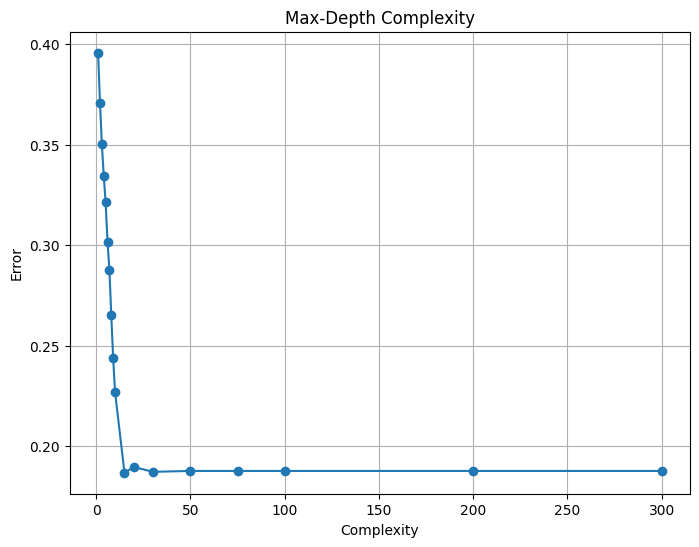

In [ ]:
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50, 75, 100, 200, 300 ]
complexity_error('Max-Depth', max_depth_values = max_depth_values)

[0.2978075054081861, 0.29470132816701167, 0.24507075454324467, 0.237979339624263, 0.22269350993117298, 0.2215833891954142, 0.20939366929157066, 0.20784279059945532, 0.2056277056277056, 0.20540548504246747, 0.19853899173241207, 0.19566092821906766, 0.19344265112841408, 0.19588363989952184, 0.1901221108254575, 0.18768406862564557, 0.18635541051876847, 0.18591293372915607]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50, 75, 100, 200, 300]


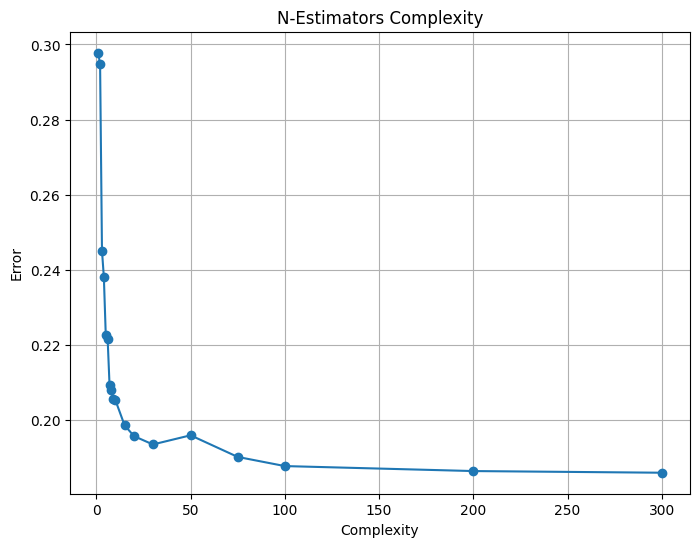

In [ ]:
n_estimator_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50, 75, 100, 200, 300 ]
complexity_error('N-Estimators', n_estimator_values = n_estimator_values)

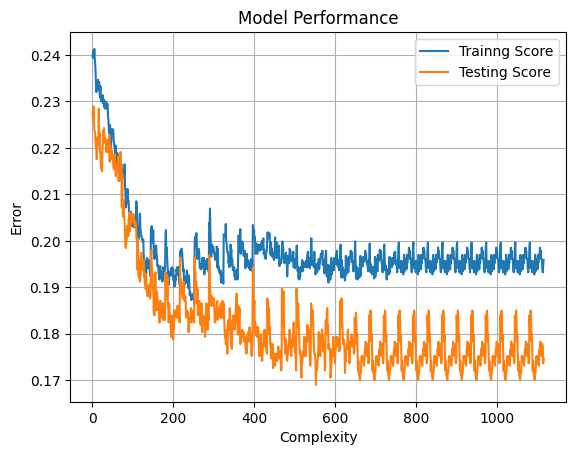

In [ ]:
max_depth_values = range(10, 41)
n_estimator_values = range(15, 51)

cv_score = []
test_score = []
best_combination = []

complexity_values = n_estimator_values

for max_depth in max_depth_values:
  for n_est in n_estimator_values:
    # Create your RandomForestClassifier with desired hyperparameters
    rf_classifier = RandomForestClassifier(n_estimators=n_est, max_depth=max_depth, random_state=42)
    # Perform 5-fold cross-validation (you can change the number of folds with the cv parameter)
    scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
    cv_score.append(1 - scores.mean())

    rf_classifier.fit(X_train, y_train)

    # Evaluating with train data
    y_test_pred = rf_classifier.predict(X_test)
    test_score.append(1 - accuracy_score(y_test, y_test_pred))

    best_combination.append((n_est, max_depth))

# Create an array of x-values (e.g., epochs, iterations, etc.)
x_values = np.arange(1, len(cv_score) + 1)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the lines for cv_score, train_score, and test_score
plt.plot(x_values, cv_score, label='Trainng Score')
plt.plot(x_values, test_score, label='Testing Score')

# Add labels and a legend
plt.xlabel('Complexity')
plt.ylabel('Error')
plt.title('Model Performance')
plt.legend()

# Display the graph
plt.grid()
plt.show()

In [ ]:
min = 99999
min_pair = (0, 0)
for index, pair in enumerate(best_combination[100:150]):
  index += 100
  diff = abs(pair[0] - pair[1])
  if diff < min and cv_score[index] < 0.2:
    min = diff
    min_pair = pair

print("N-Estimator: {}\nMax-Depth: {}".format(min_pair[0], min_pair[1]))

N-Estimator: 18
Max-Depth: 13


### **Enhanced Model Evaluation**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=15, random_state=42)
print('Evaluation with Training Data:')
for metric in ['accuracy', 'precision_macro', 'recall_macro']:
  # Perform 5-fold cross-validation (you can change the number of folds with the cv parameter)
  scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring = metric)

  # Calculate and print the mean and standard deviation of the cross-validation scores
  print(metric, ': ', round(scores.mean() * 100, 2), '%')

rf_classifier.fit(X_train, y_train)

print('\nEvalution with Testing Data:')
# Evaluating with test data
y_test_pred = rf_classifier.predict(X_test)
evaluate(y_test, y_test_pred)

Evaluation with Training Data:
accuracy :  80.57 %
precision_macro :  80.35 %
recall_macro :  80.54 %

Evalution with Testing Data:
accuracy: 80.78%
precision: 80.42%
recall: 80.68%
Confusion Matrix:
[[441  15   6  32]
 [ 30 320  57  84]
 [  1  32 451  10]
 [ 39  52  14 351]]
